In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime

In [ ]:
data = yf.download(
    ["NVDA", "AAPL"], 
    start="2025-12-01",
    end="2025-12-08",
    interval="1m"=
)

data = data.reset_index()
data.head()

/tmp/ipykernel_2228/531081231.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  2 of 2 completed


Price                   Datetime       Close                    High  \
Ticker                                  AAPL        NVDA        AAPL   
0      2025-12-01 14:30:00+00:00  278.339996  174.684998  278.549988   
1      2025-12-01 14:31:00+00:00  278.040009  173.839996  278.769989   
2      2025-12-01 14:32:00+00:00  278.010010  174.835007  278.379395   
3      2025-12-01 14:33:00+00:00  277.799988  175.660004  278.100006   
4      2025-12-01 14:34:00+00:00  277.575012  175.865005  277.875092   

Price                      Low                    Open               Volume  \
Ticker        NVDA        AAPL        NVDA        AAPL        NVDA     AAPL   
0       175.000000  278.059998  174.419998  278.149994  174.699997  1074019   
1       174.759995  278.040009  173.679993  278.399994  174.705002   201905   
2       174.839996  277.869995  173.803497  278.040009  173.839905    81466   
3       175.810104  277.720001  174.768204  278.019989  174.820007    81486   
4       175.940002  277.350006  175.570099  277.829987  175.641006    91197   

Price            
Ticker     NVDA  
0       6913762  
1       1331845  
2        882719  
3       1282376  
4        646296

In [ ]:
# "2025-12-01 14:30:00" = {
# 		"symbol": "AAPL",
# 		"name": "Apple Inc.",
# 		"price": 232.8,
# }

# "2025-12-01 14:31:00" = {
# 		"symbol": "AAPL",
# 		"name": "Apple Inc.",
# 		"price": 232.95,
# }

# "2025-12-01 14:32:00" = {
# 		"symbol": "AAPL",
# 		"name": "Apple Inc.",
# 		"price": 233.15,
# }


# STOCK   TIME                        OPEN                CLOSE
# APPL   2025-12-01 14:30:00          232.8               232.95   
# APPL   2025-12-01 14:31:00          232.95              233.15    


In [2]:
import yfinance as yf
from datetime import datetime

# stocks = yf.Ticker("NVDA")

stocks = yf.Ticker("GOOG")

data = stocks.history(
                    # start="2025-12-01",
                    # end = "2025-12-08",
                    # end=datetime.now().strftime("%Y-%m-%d"),
                    period="5y",
                    # interval="1m"
                    )
data = data.reset_index()

data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-12-14 00:00:00-05:00,88.089311,89.200476,87.206679,87.347870,32004000,0.0,0.0
1,2020-12-15 00:00:00-05:00,87.564250,87.911643,86.846133,87.730499,29646000,0.0,0.0
2,2020-12-16 00:00:00-05:00,87.984116,87.990075,87.150372,87.493797,30270000,0.0,0.0
3,2020-12-17 00:00:00-05:00,87.767239,87.929724,86.285849,86.744408,32494000,0.0,0.0
4,2020-12-18 00:00:00-05:00,87.056058,87.102213,85.370700,85.906181,80328000,0.0,0.0


In [3]:
data['return'] = data['Close'].pct_change()
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,return
0,2020-12-14 00:00:00-05:00,88.089311,89.200476,87.206679,87.347870,32004000,0.0,0.0,NaN
1,2020-12-15 00:00:00-05:00,87.564250,87.911643,86.846133,87.730499,29646000,0.0,0.0,0.004381
2,2020-12-16 00:00:00-05:00,87.984116,87.990075,87.150372,87.493797,30270000,0.0,0.0,-0.002698
3,2020-12-17 00:00:00-05:00,87.767239,87.929724,86.285849,86.744408,32494000,0.0,0.0,-0.008565
4,2020-12-18 00:00:00-05:00,87.056058,87.102213,85.370700,85.906181,80328000,0.0,0.0,-0.009663


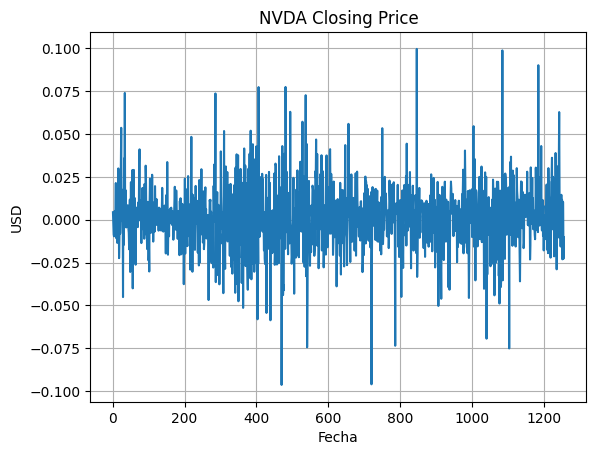

In [4]:
import matplotlib.pyplot as plt

plt.plot(data["return"])
plt.title("NVDA Closing Price")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.grid(True)
plt.show()

In [5]:
# stocks = yf.Ticker("AMD")
stocks = yf.Ticker("GOOGL")

data_amd = stocks.history(
                    # start="2025-12-01",
                    # end = "2025-12-08",
                    # end=datetime.now().strftime("%Y-%m-%d"),
                    period="5y",
                    # interval="1m"
                    )
data_amd = data_amd.reset_index()
data_amd['return'] = data_amd['Close'].pct_change()
data_amd.head()

df = data.merge(data_amd, on="Date", suffixes=("_nvda", "_amd"))
df

,Date,Open_nvda,High_nvda,Low_nvda,Close_nvda,Volume_nvda,Dividends_nvda,Stock Splits_nvda,return_nvda,Open_amd,High_amd,Low_amd,Close_amd,Volume_amd,Dividends_amd,Stock Splits_amd,return_amd
0,2020-12-14 00:00:00-05:00,88.089311,89.200476,87.206679,87.347870,32004000,0.00,0.0,NaN,87.872061,88.818901,86.800650,86.955978,33050000,0.00,0.0,NaN
1,2020-12-15 00:00:00-05:00,87.564250,87.911643,86.846133,87.730499,29646000,0.00,0.0,0.004381,87.333137,87.538586,86.430465,87.393684,21352000,0.00,0.0,0.005034
2,2020-12-16 00:00:00-05:00,87.984116,87.990075,87.150372,87.493797,30270000,0.00,0.0,-0.002698,87.792169,87.792169,86.797192,87.200638,24676000,0.00,0.0,-0.002209
3,2020-12-17 00:00:00-05:00,87.767239,87.929724,86.285849,86.744408,32494000,0.00,0.0,-0.008565,87.535118,87.673076,85.908409,86.372894,34880000,0.00,0.0,-0.009492
4,2020-12-18 00:00:00-05:00,87.056058,87.102213,85.370700,85.906181,80328000,0.00,0.0,-0.009663,86.653782,86.762458,85.106967,85.663757,85256000,0.00,0.0,-0.008210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,2025-12-08 00:00:00-05:00,321.029999,321.230011,311.910004,314.450012,22006900,0.21,0.0,-0.023083,320.049988,320.440002,311.220001,313.720001,33909400,0.21,0.0,-0.022862
1252,2025-12-09 00:00:00-05:00,313.100006,318.709015,312.619995,317.750000,14151300,0.00,0.0,0.010494,312.369995,317.989990,311.899994,317.079987,30194000,0.00,0.0,0.010710
1253,2025-12-10 00:00:00-05:00,316.619995,321.869995,315.399994,321.000000,22764500,0.00,0.0,0.010228,315.829987,321.309998,314.679993,320.209991,33428900,0.00,0.0,0.009871
1254,2025-12-11 00:00:00-05:00,321.100006,321.989990,309.880005,313.700012,25912100,0.00,0.0,-0.022741,320.079987,321.119995,308.600006,312.429993,42353700,0.00,0.0,-0.024297


In [6]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

correlation = df['return_nvda'].corr(df['return_amd'])
print(f"1. Correlación de Retornos: {correlation:.4f}")

1. Correlación de Retornos: 0.9953


In [7]:
Y = np.log(df['Close_nvda'])  # Variable dependiente
X = np.log(df['Close_amd'])   # Variable independiente
X = sm.add_constant(X)        # Necesario para la regresión


model = sm.OLS(Y, X).fit()
beta = model.params['Close_amd']
print(f"2. Hedge Ratio (Beta): {beta:.4f}")

spread = Y - model.predict(X)

adf_result = adfuller(spread)
p_value = adf_result[1]

print(f"3. P-Value del Test de Cointegración: {p_value:.5f}")

2. Hedge Ratio (Beta): 0.9989
3. P-Value del Test de Cointegración: 0.00303


In [8]:
df['log_Y'] = np.log(df['Close_nvda'])
df['log_X'] = np.log(df['Close_amd'])
df['spread'] = df['log_Y'] - (beta * df['log_X'])

In [9]:
window = 20 
df['mean_spread'] = df['spread'].rolling(window=window).mean()
df['std_spread'] = df['spread'].rolling(window=window).std()
df['z_score'] = (df['spread'] - df['mean_spread']) / df['std_spread']

In [10]:
df['signal'] = 0
# Entrada Long Spread (Comprar Y, Vender X) cuando Z < -2
df.loc[df['z_score'] < -2, 'signal'] = 1 
# Entrada Short Spread (Vender Y, Comprar X) cuando Z > 2
df.loc[df['z_score'] > 2, 'signal'] = -1

In [11]:
df['y_ret'] = df['Close_nvda'].pct_change()
df['x_ret'] = df['Close_amd'].pct_change()
df['portfolio_ret'] = df['signal'].shift(1) * (df['y_ret'] - beta * df['x_ret'])

In [12]:
df['strategy_equity'] = (1 + df['portfolio_ret']).cumprod()

In [13]:
df.head()

,Date,Open_nvda,High_nvda,Low_nvda,Close_nvda,Volume_nvda,Dividends_nvda,Stock Splits_nvda,return_nvda,Open_amd,...,log_X,spread,mean_spread,std_spread,z_score,signal,y_ret,x_ret,portfolio_ret,strategy_equity
0,2020-12-14 00:00:00-05:00,88.089311,89.200476,87.206679,87.347870,32004000,0.0,0.0,NaN,87.872061,...,4.465402,0.009400,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2020-12-15 00:00:00-05:00,87.564250,87.911643,86.846133,87.730499,29646000,0.0,0.0,0.004381,87.333137,...,4.470423,0.008755,NaN,NaN,NaN,0,0.004381,0.005034,-0.0,1.0
2,2020-12-16 00:00:00-05:00,87.984116,87.990075,87.150372,87.493797,30270000,0.0,0.0,-0.002698,87.792169,...,4.468212,0.008262,NaN,NaN,NaN,0,-0.002698,-0.002209,-0.0,1.0
3,2020-12-17 00:00:00-05:00,87.767239,87.929724,86.285849,86.744408,32494000,0.0,0.0,-0.008565,87.535118,...,4.458674,0.009188,NaN,NaN,NaN,0,-0.008565,-0.009492,0.0,1.0
4,2020-12-18 00:00:00-05:00,87.056058,87.102213,85.370700,85.906181,80328000,0.0,0.0,-0.009663,86.653782,...,4.450430,0.007713,NaN,NaN,NaN,0,-0.009663,-0.008210,-0.0,1.0


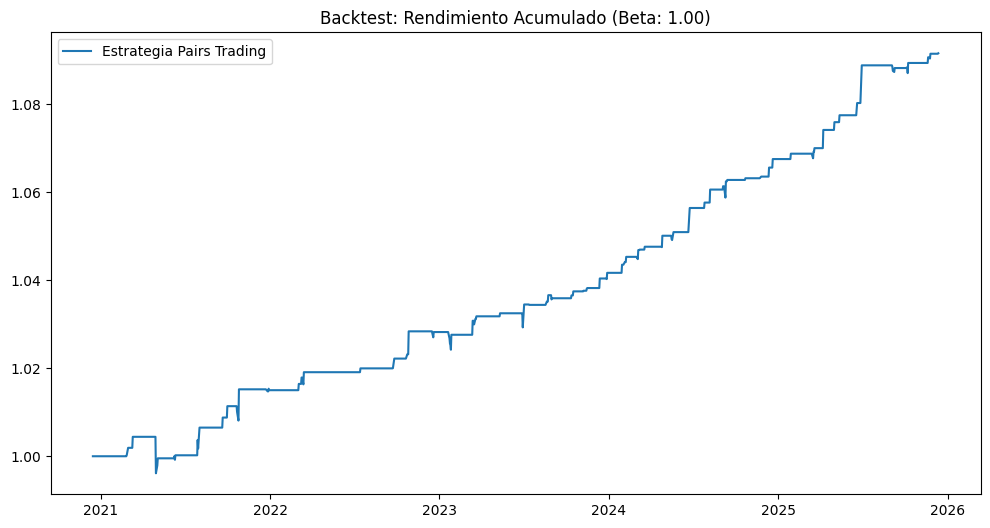

Retorno Total: 9.16%


In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['strategy_equity'], label='Estrategia Pairs Trading', linewidth=1.5)
plt.title(f'Backtest: Rendimiento Acumulado (Beta: {beta:.2f})')
plt.legend()
plt.show()

print(f"Retorno Total: {(df['strategy_equity'].iloc[-1] - 1)*100:.2f}%")

In [15]:
from statsmodels.regression.rolling import RollingOLS

Y = np.log(df['Close_nvda'])  # Variable dependiente
X = np.log(df['Close_amd'])   # Variable independiente
X = sm.add_constant(X)        # Necesario para la regresión

window = 60
model = RollingOLS(Y, X, window=window)
rolling_res = model.fit()

In [16]:
df['rolling_beta'] = rolling_res.params['Close_amd']

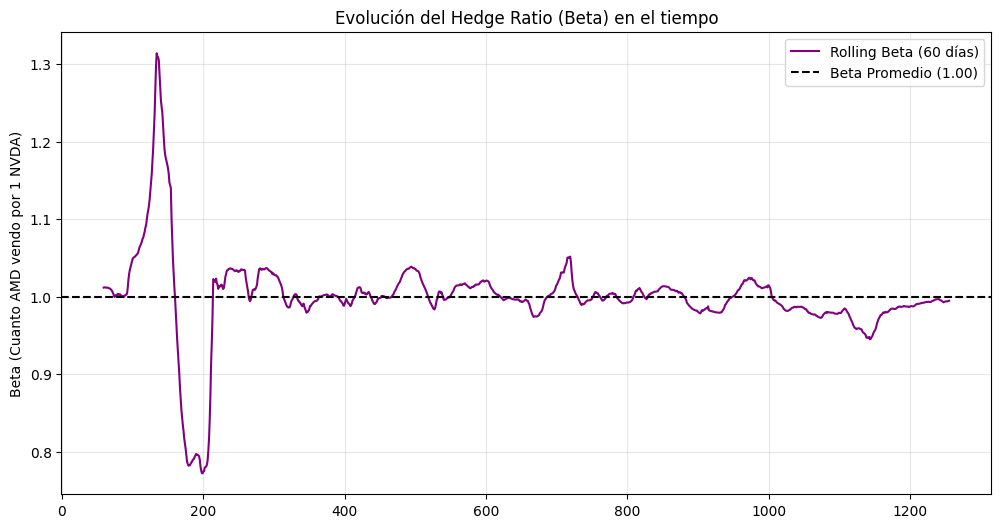

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rolling_beta'], label='Rolling Beta (60 días)', color='purple')
plt.axhline(df['rolling_beta'].mean(), color='black', linestyle='--', label=f'Beta Promedio ({df["rolling_beta"].mean():.2f})')
plt.title('Evolución del Hedge Ratio (Beta) en el tiempo')
plt.ylabel('Beta (Cuanto AMD vendo por 1 NVDA)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

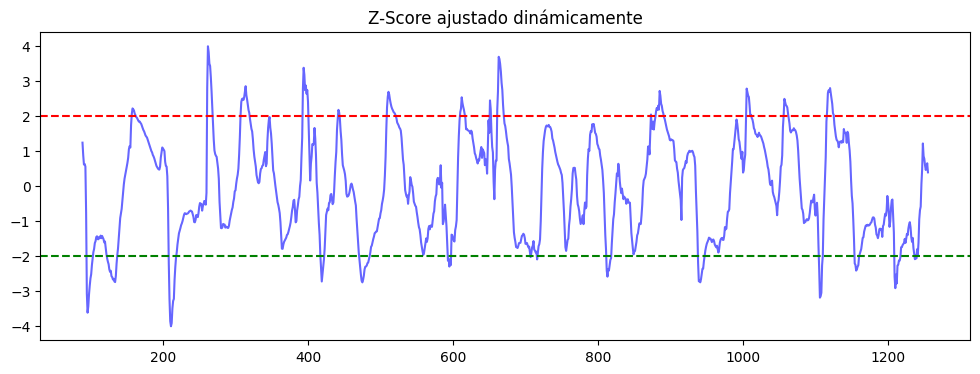

In [18]:
df['spread_dynamic'] = Y - (df['rolling_beta'].shift(1) * np.log(df['Close_amd']))

# 5. Calcular Z-Score Dinámico
df['z_score_dyn'] = (df['spread_dynamic'] - df['spread_dynamic'].rolling(30).mean()) / df['spread_dynamic'].rolling(30).std()

# 6. Graficar el nuevo Z-Score
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['z_score_dyn'], label='Z-Score Dinámico', color='blue', alpha=0.6)
plt.axhline(2, color='red', linestyle='--')
plt.axhline(-2, color='green', linestyle='--')
plt.title('Z-Score ajustado dinámicamente')
plt.show()

In [19]:
df['dynamic_spread'] = np.log(df['Close_nvda']) - (df['rolling_beta'].shift(1) * np.log(df['Close_amd']))

In [20]:
window = 30
spread_mean = df['dynamic_spread'].rolling(window).mean()
spread_std = df['dynamic_spread'].rolling(window).std()
df['z_score_dyn'] = (df['dynamic_spread'] - spread_mean) / spread_std

In [21]:
# 3. Generar Señales (Igual que antes, pero con el Z-Score nuevo)
df['signal_dyn'] = 0
df.loc[df['z_score_dyn'] < -2, 'signal_dyn'] = 1   # Long Spread
df.loc[df['z_score_dyn'] > 2, 'signal_dyn'] = -1  # Short Spread

In [22]:
# Si el Z-Score se va de las manos (> 4), cerramos todo.
df.loc[abs(df['z_score_dyn']) > 4, 'signal_dyn'] = 0

In [23]:
# 4. Calcular Retorno del Portafolio Dinámico
# Retorno = Retorno_Y - (Beta_Dinámico * Retorno_X)
# Multiplicamos por la señal de ayer (shift 1)
rets_asset_y = df['Close_nvda'].pct_change()
rets_asset_x = df['Close_amd'].pct_change()

In [24]:
hedge_ratio_diario = df['rolling_beta'].shift(1)

df['strat_ret_dyn'] = df['signal_dyn'].shift(1) * (rets_asset_y - (hedge_ratio_diario * rets_asset_x))

# 5. Curva de Equidad
df['equity_dyn'] = (1 + df['strat_ret_dyn'].fillna(0)).cumprod()

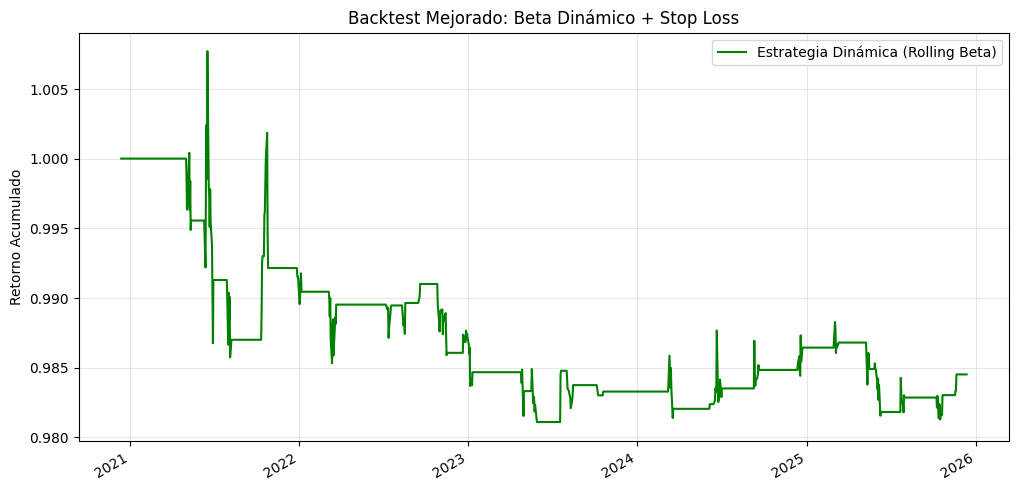

Retorno Final Dinámico: -1.55%


In [25]:
plt.figure(figsize=(12, 6))

# Graficamos la nueva curva dinámica
plt.plot(df['Date'], df['equity_dyn'], label='Estrategia Dinámica (Rolling Beta)', color='green')

# (Opcional) Grafica la vieja para comparar si la tienes guardada
# plt.plot(df['Date'], df['strategy_equity'], label='Estrategia Estática (Vieja)', color='gray', alpha=0.5)

plt.title('Backtest Mejorado: Beta Dinámico + Stop Loss')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()
plt.show()

print(f"Retorno Final Dinámico: {(df['equity_dyn'].iloc[-1] - 1)*100:.2f}%")

In [4]:
url = 'https://financialmodelingprep.com/stable/historical-chart/1min?symbol=AAPL'

response = requests.get(f'{url}')
stocks_data = response.json()
stocks_data

{'Error Message': 'Invalid API KEY. Feel free to create a Free API Key or visit https://site.financialmodelingprep.com/faqs?search=why-is-my-api-key-invalid for more information.'}

In [16]:
def extract_transform(market,apikey, **kwargs):
    """
    Funcion para obtener los datos de las diferentes bolsas de valores. Adicionalmente se usa el filtro al endpoint isActivelyTrading=True para obtener aquellos que se encuentran activos. Finalmente carga los datos en una tabla de redshift
    market: nombre del mercado de valores a extraer (NYSE, NASDAQ, EURONEXT, AMEX, TSX, ETF, etc)    
    """
    
    #Endpoint principal a usar, en el readme se muestra informacion sobre la API y como obtener una key, ya que es una API publica.
    url = 'https://financialmodelingprep.com/api/v3/stock-screener'

    response = requests.get(f'{url}?exchange={market}&isActivelyTrading=True&limit=10000&apikey={apikey}')
    stocks_data = response.json()
    print(stocks_data)
    # agregando fecha y hora que se extrajo la data, ademas de reemplazar valores 'None' por vacios para las etiquetas de sector, industry, lastAnnualDividend. Se elimina aquellos que contengan 'None' en isEtf, isFund, beta, country
    data_filtered = []
    now = datetime.now()
    date_string = now.strftime("%Y-%m-%d %H:%M:%S")
    for stock in stocks_data:
        # stock['sector'] = '' if stock['sector'] is None else stock['sector']
        # stock['industry'] = '' if stock['industry'] is None else stock['industry']
        # stock['lastAnnualDividend'] = 0 if stock['lastAnnualDividend'] is None else stock['lastAnnualDividend']
        # if stock['isEtf'] is not None and stock['isFund'] is not None and stock['beta'] is not None and stock['country'] is not None:        
        #     stock['date'] = date_string
        #     data_filtered.append(stock)
        print(stock)
    # print(stocks_data)

In [17]:
extract_transform(market = 'NASDAQ',apikey='9AyqzrSFddQOVtsB8vNpokqLabX9gdK9')

{'Error Message': 'Legacy Endpoint : Due to Legacy endpoints being no longer supported - This endpoint is only available for legacy users who have valid subscriptions prior August 31, 2025. Please visit our subscription page to upgrade your plan or contact us at https://site.financialmodelingprep.com/developer/docs/pricing'}
Error Message
